In [67]:
# check that python is working
print("Hello Air Quality Project")

Hello Air Quality Project


In [70]:
# installing all required libraries
!pip install pandas numpy scikit-learn matplotlib seaborn 

Defaulting to user installation because normal site-packages is not writeable


In [72]:
# importing the required(important) libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [74]:
# uploading the dataset
df = pd.read_csv('updated_pollution_dataset.csv')

In [75]:
# printing the first 5 rows
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [76]:
#checking the shape of the dataset
df.shape

(5000, 10)

In [77]:
# displaying the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [78]:
# checking if there is any missing value in the dataset
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [79]:
# declaring the input and output features
X = df.drop("Air Quality", axis=1)
y = df["Air Quality"]

In [80]:
# mapping the output of the air quality
aqi_mapping = {
    "Good": 0,
    "Moderate": 1,
    "Poor": 2,
    "Hazardous": 3 
}

y_encoded = df["Air Quality"].map(aqi_mapping)

In [81]:
# encoding the mapped output and printing the first 5 row
df[["Air Quality"]].assign(Encoded=y_encoded).head()

,Air Quality,Encoded
0,Moderate,1
1,Moderate,1
2,Moderate,1
3,Good,0
4,Good,0


In [82]:
# scaling the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [83]:
# training 80% and testing 20% of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [84]:
# create Random Forest model as the first model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

In [85]:
# train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [86]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [87]:
# Checking accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_accuracy

0.957

In [88]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.97      0.97      0.97       294
           2       0.87      0.91      0.89       186
           3       0.92      0.86      0.89       111

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.96      0.96      0.96      1000



In [89]:
# training accuracy
train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

train_accuracy

0.9845

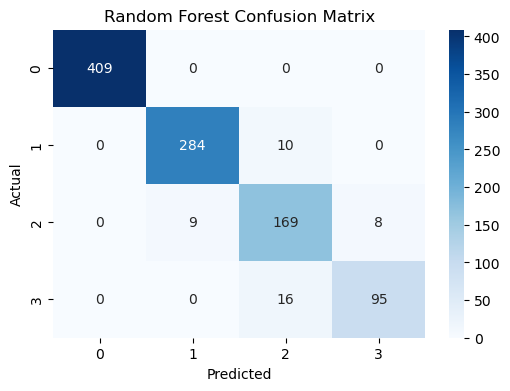

In [90]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [91]:
# counting the value of the output feature
df["Air Quality"].value_counts(normalize=True)

Air Quality
Good         0.4
Moderate     0.3
Poor         0.2
Hazardous    0.1
Name: proportion, dtype: float64

In [92]:
# create Logistic regression model as the second model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

In [93]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [94]:
# Predict and evaluate the model
y_pred_lr = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.948

In [95]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.96      0.96      0.96       294
           2       0.84      0.89      0.86       186
           3       0.92      0.82      0.87       111

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



In [96]:
# Probabilities form each model
rf_probs = rf_model.predict_proba(X_test)
lr_probs = lr_model.predict_proba(X_test)

In [97]:
# Average probabilites 
hybrid_probs = (rf_probs + lr_probs) / 2

# Final prediction
hybrid_pred = np.argmax(hybrid_probs, axis=1)

In [98]:
hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
hybrid_accuracy

0.956

In [99]:
reverse_mapping = {v: k for k, v in aqi_mapping.items()}

In [100]:
def predict_air_quality(input_data):
    """
    input_data: list of 9 feature values in this order:
    [Temperature, Humidity, PM2.5, PM10, NO2, SO2, CO, Industrial_Proximity, Population_Density] 
    """
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Scale input 
    input_scaled = scaler.transform(input_df)

    # Get probabilities from both models 
    rf_prob = rf_model.predict_proba(input_scaled)
    lr_prob = lr_model.predict_proba(input_scaled)
    
    # Hybrid Probability 
    hybrid_prob = (rf_prob + lr_prob) / 2 
     
    # Final prediction 
    predicted_class = np.argmax(hybrid_prob)
    
    # Confidence score
    confidence = np.max(hybrid_prob)
    
    # Decode label
    air_quality = reverse_mapping[predicted_class]
    
    return air_quality, confidence 

In [101]:
sample_input = [
    30,   # Temperature
    70,   # Humidity
    55,   # PM2.5
    80,   # PM10
    40,   # NO2
    20,   # SO2
    1.8,  # CO
    3,    # Industiral proximity
    1200  # Population density
]

result, confidence = predict_air_quality(sample_input)

print("Predicted Air Quality:", result)
print("Confidence:", round(confidence * 100, 2), "%")

Predicted Air Quality: Hazardous
Confidence: 83.15 %


In [103]:
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(lr_model, "lr_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']